In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-details/Credit_card.csv
/kaggle/input/credit-card-details/Credit_card_label.csv


In [2]:
path = '/kaggle/input/credit-card-details/Credit_card.csv'
df = pd.read_csv(path)
df.shape

(1548, 18)

In [3]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [4]:
df.describe(include='object')

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation
count,1541,1548,1548,1548,1548,1548,1548,1060
unique,2,2,2,4,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,973,924,1010,798,1031,1049,1380,268


In [5]:
df.describe(exclude='object')

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


In [6]:
import torch,numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth = 140,edgeitems=7,sci_mode = False)
pd.set_option('display.width',140)

In [7]:
df.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [8]:
modes = df.mode().iloc[0]
modes

Ind_ID                                   5008827
GENDER                                         F
Car_Owner                                      N
Propert_Owner                                  Y
CHILDREN                                     0.0
Annual_income                           135000.0
Type_Income                              Working
EDUCATION          Secondary / secondary special
Marital_status                           Married
Housing_type                   House / apartment
Birthday_count                          -22655.0
Employed_days                           365243.0
Mobile_phone                                 1.0
Work_Phone                                   0.0
Phone                                        0.0
EMAIL_ID                                     0.0
Type_Occupation                         Laborers
Family_Members                               2.0
Name: 0, dtype: object

In [9]:
df.fillna(modes,inplace = True)
df.isna().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
dtype: int64

In [10]:

df.describe(include=(np.number))

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1.548000e+03,1548.000000,1.548000e+03,1548.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.905614e+05,-16134.348837,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.126150e+05,4271.730614,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19764.250000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.575000e+05,-15814.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12483.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


<Axes: >

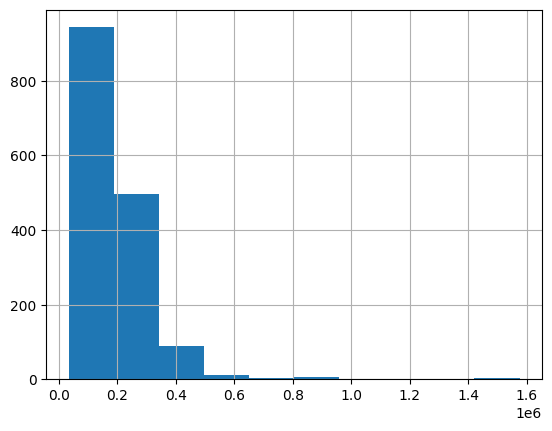

In [11]:
df['Annual_income'].hist()

<Axes: >

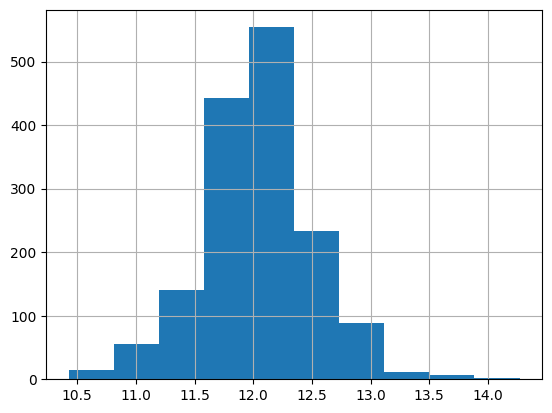

In [12]:
df['log_income'] = np.log(df['Annual_income'] +1)
df['log_income'].hist()

In [13]:
df = pd.get_dummies(df,columns=['GENDER','Car_Owner','Propert_Owner','EDUCATION','Type_Income',
                               'Marital_status','Housing_type','Type_Occupation'])
df.columns

Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members', 'log_income', 'GENDER_F', 'GENDER_M', 'Car_Owner_N', 'Car_Owner_Y', 'Propert_Owner_N', 'Propert_Owner_Y',
       'EDUCATION_Academic degree', 'EDUCATION_Higher education', 'EDUCATION_Incomplete higher', 'EDUCATION_Lower secondary',
       'EDUCATION_Secondary / secondary special', 'Type_Income_Commercial associate', 'Type_Income_Pensioner', 'Type_Income_State servant',
       'Type_Income_Working', 'Marital_status_Civil marriage', 'Marital_status_Married', 'Marital_status_Separated',
       'Marital_status_Single / not married', 'Marital_status_Widow', 'Housing_type_Co-op apartment', 'Housing_type_House / apartment',
       'Housing_type_Municipal apartment', 'Housing_type_Office apartment', 'Housing_type_Rented apartment', 'Housing_type_With parents',
       'Type_Occupation_Accountants', 'Type_Occupation_Cleaning staff', 'Type_Oc

In [14]:
label_df = pd.read_csv('/kaggle/input/credit-card-details/Credit_card_label.csv')
label_df.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [15]:
df = pd.merge(df,label_df, on='Ind_ID')
df.head()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff,label
0,5008827,0,180000.0,-18772.0,365243,1,0,0,0,2,...,False,False,False,False,False,False,False,False,False,1
1,5009744,0,315000.0,-13557.0,-586,1,1,1,0,2,...,False,False,False,False,False,False,False,False,False,1
2,5009746,0,315000.0,-22655.0,-586,1,1,1,0,2,...,False,False,False,False,False,False,False,False,False,1
3,5009749,0,135000.0,-13557.0,-586,1,1,1,0,2,...,False,False,False,False,False,False,False,False,False,1
4,5009752,0,315000.0,-13557.0,-586,1,1,1,0,2,...,False,False,False,False,False,False,False,False,False,1


In [16]:
from torch import tensor 
t_dep = tensor(df.label)


In [17]:
df.drop(columns=['Ind_ID','Annual_income'],inplace = True)

In [18]:
dep_col = 'label'
indep_cols = df.columns[df.columns != dep_col]
indep_cols 

Index(['CHILDREN', 'Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'log_income',
       'GENDER_F', 'GENDER_M', 'Car_Owner_N', 'Car_Owner_Y', 'Propert_Owner_N', 'Propert_Owner_Y', 'EDUCATION_Academic degree',
       'EDUCATION_Higher education', 'EDUCATION_Incomplete higher', 'EDUCATION_Lower secondary', 'EDUCATION_Secondary / secondary special',
       'Type_Income_Commercial associate', 'Type_Income_Pensioner', 'Type_Income_State servant', 'Type_Income_Working',
       'Marital_status_Civil marriage', 'Marital_status_Married', 'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_Co-op apartment', 'Housing_type_House / apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment', 'Housing_type_With parents', 'Type_Occupation_Accountants',
       'Type_Occupation_Cleaning staff', 'Type_Occupation_Cooking staff', 'T

In [19]:
indep_data = df[indep_cols]

indep_array = indep_data.astype('float32').values
t_indep = torch.tensor(indep_array, dtype=torch.float)
t_indep

tensor([[         0.,     -18772.,     365243.,          1.,          0.,          0.,          0.,  ...,          0.,          0.,
                  0.,          0.,          0.,          0.,          0.],
        [         0.,     -13557.,       -586.,          1.,          1.,          1.,          0.,  ...,          0.,          0.,
                  0.,          0.,          0.,          0.,          0.],
        [         0.,     -22655.,       -586.,          1.,          1.,          1.,          0.,  ...,          0.,          0.,
                  0.,          0.,          0.,          0.,          0.],
        [         0.,     -13557.,       -586.,          1.,          1.,          1.,          0.,  ...,          0.,          0.,
                  0.,          0.,          0.,          0.,          0.],
        [         0.,     -13557.,       -586.,          1.,          1.,          1.,          0.,  ...,          0.,          0.,
                  0.,          0.,      

In [20]:
t_indep.shape

torch.Size([1548, 53])

In [57]:
n_coeff = t_indep.shape[1]
n_coeff

53

In [22]:
values, index = t_indep.max(dim=0)
t_indep = t_indep/values
t_indep

tensor([[     0.0000,      2.4363,      1.0000,      1.0000,      0.0000,      0.0000,      0.0000,  ...,      0.0000,      0.0000,
              0.0000,      0.0000,      0.0000,      0.0000,      0.0000],
        [     0.0000,      1.7595,     -0.0016,      1.0000,      1.0000,      1.0000,      0.0000,  ...,      0.0000,      0.0000,
              0.0000,      0.0000,      0.0000,      0.0000,      0.0000],
        [     0.0000,      2.9403,     -0.0016,      1.0000,      1.0000,      1.0000,      0.0000,  ...,      0.0000,      0.0000,
              0.0000,      0.0000,      0.0000,      0.0000,      0.0000],
        [     0.0000,      1.7595,     -0.0016,      1.0000,      1.0000,      1.0000,      0.0000,  ...,      0.0000,      0.0000,
              0.0000,      0.0000,      0.0000,      0.0000,      0.0000],
        [     0.0000,      1.7595,     -0.0016,      1.0000,      1.0000,      1.0000,      0.0000,  ...,      0.0000,      0.0000,
              0.0000,      0.0000,      

In [23]:
coeffs = torch.rand(n_coeffs)-0.5
coeffs

tensor([ 0.3084, -0.1014,  0.0556, -0.1226, -0.2011,  0.2223, -0.2143,  0.1503,  0.4923,  0.0406,  0.3217,  0.0646, -0.2883, -0.3996,
        -0.4090,  0.2249, -0.4486, -0.0176, -0.0897,  0.1735, -0.2147, -0.0295, -0.2744, -0.2438,  0.2849,  0.1163, -0.1500,  0.3709,
         0.3902,  0.1548,  0.0263, -0.3785,  0.4103,  0.4915, -0.1310, -0.3433,  0.3120, -0.2282,  0.0859,  0.3813,  0.0896,  0.4968,
         0.2399, -0.2834, -0.3880,  0.2633, -0.2677,  0.0368,  0.4108,  0.0357,  0.2815,  0.1268,  0.2209])

In [24]:
t_indep*coeffs

tensor([[     0.0000,     -0.2470,      0.0556,     -0.1226,     -0.0000,      0.0000,     -0.0000,  ...,     -0.0000,      0.0000,
              0.0000,      0.0000,      0.0000,      0.0000,      0.0000],
        [     0.0000,     -0.1783,     -0.0001,     -0.1226,     -0.2011,      0.2223,     -0.0000,  ...,     -0.0000,      0.0000,
              0.0000,      0.0000,      0.0000,      0.0000,      0.0000],
        [     0.0000,     -0.2980,     -0.0001,     -0.1226,     -0.2011,      0.2223,     -0.0000,  ...,     -0.0000,      0.0000,
              0.0000,      0.0000,      0.0000,      0.0000,      0.0000],
        [     0.0000,     -0.1783,     -0.0001,     -0.1226,     -0.2011,      0.2223,     -0.0000,  ...,     -0.0000,      0.0000,
              0.0000,      0.0000,      0.0000,      0.0000,      0.0000],
        [     0.0000,     -0.1783,     -0.0001,     -0.1226,     -0.2011,      0.2223,     -0.0000,  ...,     -0.0000,      0.0000,
              0.0000,      0.0000,      

In [25]:
preds = (t_indep*coeffs).sum(axis = 1)
preds[:10]

tensor([-0.8710, -1.2745, -1.3942, -1.3037, -1.2745, -1.0894, -1.2745, -0.2119, -0.0409,  0.1442])

In [26]:
loss = torch.abs(preds - t_dep).mean()
loss

tensor(0.5439)

In [46]:
def calc_preds(coeffs, indeps): 
    return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): 
    return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [47]:
coeffs.requires_grad_()

tensor([ 0.3094, -0.0290,  0.0587, -0.0863, -0.1913,  0.2237, -0.2044,  0.1562,  0.5228,  0.0730,  0.3256,  0.0672, -0.2546, -0.3834,
        -0.3889,  0.2248, -0.4097, -0.0152, -0.0885,  0.1674, -0.2039, -0.0253, -0.2712, -0.2257,  0.2813,  0.1578, -0.1422,  0.3671,
         0.3845,  0.1546,  0.0553, -0.3728,  0.4101,  0.4906, -0.1279, -0.3379,  0.3105, -0.2273,  0.0890,  0.3728,  0.0898,  0.4914,
         0.2401, -0.2462, -0.3874,  0.2620, -0.2635,  0.0364,  0.4104,  0.0396,  0.2806,  0.1262,  0.2207], requires_grad=True)

In [48]:
loss = calc_loss(coeffs,t_indep,t_dep)
loss

tensor(0.4131, grad_fn=<MeanBackward0>)

In [31]:
loss.backward()

In [32]:
coeffs.grad

tensor([    -0.0171,     -1.2224,     -0.0888,     -0.5827,     -0.1266,     -0.1350,     -0.0756,     -0.0878,     -0.4903,     -0.4186,
            -0.1641,     -0.2778,     -0.3049,     -0.2145,     -0.3682,      0.0000,     -0.2636,     -0.0323,     -0.0110,     -0.2758,
            -0.1350,     -0.0975,     -0.0478,     -0.3023,     -0.0123,     -0.4774,     -0.0556,     -0.0420,      0.0045,     -0.0006,
            -0.5129,     -0.0342,     -0.0019,     -0.0006,     -0.0323,     -0.0284,      0.0000,     -0.0084,     -0.0646,      0.0155,
            -0.0019,      0.0071,     -0.0013,     -0.3773,     -0.0058,     -0.0310,     -0.0323,     -0.0032,      0.0013,     -0.0517,
             0.0019,     -0.0032,      0.0006])

In [50]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.3873)


In [36]:
from fastai.data.transforms import RandomSplitter
trn_split , val_split = RandomSplitter(seed=42)(df)

In [37]:
trn_indep, val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep, val_dep = t_dep[trn_split],t_dep[val_split]
val_indep.shape

torch.Size([309, 53])

In [51]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [53]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [54]:
def init_coeffs(): return(torch.rand(n_coeff)-0.5).requires_grad_()

In [55]:
def train_model(epochs = 30, lr =0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs):
        one_epoch(coeffs,lr =lr)
        return coeffs

In [43]:
def train_model(epochs = 30, lr= 0.01):
    torch.manual_seed(42)
    coeffs = init_coeffs
    for i in range(epochs):
        one_epoch(coeffs= coeffs, lr = lr)
        return coeffs

In [58]:
coeffs = train_model(18, lr=0.2)

0.585; 

In [59]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'CHILDREN': tensor(-0.4616),
 'Birthday_count': tensor(0.1674),
 'Employed_days': tensor(0.2169),
 'Mobile_phone': tensor(-0.2015),
 'Work_Phone': tensor(-0.2410),
 'Phone': tensor(-0.2884),
 'EMAIL_ID': tensor(0.4868),
 'Family_Members': tensor(0.3173),
 'log_income': tensor(0.3006),
 'GENDER_F': tensor(-0.3998),
 'GENDER_M': tensor(0.1956),
 'Car_Owner_N': tensor(0.3725),
 'Car_Owner_Y': tensor(0.1869),
 'Propert_Owner_N': tensor(0.2208),
 'Propert_Owner_Y': tensor(-0.3212),
 'EDUCATION_Academic degree': tensor(-0.0008),
 'EDUCATION_Higher education': tensor(-0.1610),
 'EDUCATION_Incomplete higher': tensor(-0.2384),
 'EDUCATION_Lower secondary': tensor(0.0483),
 'EDUCATION_Secondary / secondary special': tensor(0.0868),
 'Type_Income_Commercial associate': tensor(-0.0471),
 'Type_Income_Pensioner': tensor(0.2900),
 'Type_Income_State servant': tensor(-0.1433),
 'Type_Income_Working': tensor(-0.2189),
 'Marital_status_Civil marriage': tensor(0.3301),
 'Marital_status_Married': tensor

In [60]:
preds = calc_preds(coeffs,val_indep)

In [62]:
results = val_dep.bool()==(preds>0.5)
results[:15]

tensor([ True,  True,  True,  True, False,  True,  True,  True,  True, False, False,  True,  True,  True, False])

In [63]:
results.float().mean()

tensor(0.6570)

In [78]:
def calc_preds(coeffs, indeps):
    return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [79]:
coeffs = train_model(lr=100)

0.491; 

In [80]:
def acc(coeffs):
    return (val_dep.bool()==(calc_preds(coeffs,val_indep)>0.5)).float().mean()

In [81]:
acc(coeffs)

tensor(0.9094)

Matrix Multiplication

In [83]:
val_indep@coeffs

tensor([-192.5704, -225.2031, -165.9542, -197.7715, -179.1935, -188.0215, -165.6966, -149.9660, -187.6952, -176.1501, -181.1990, -211.8623,
        -186.7298, -205.2244, -200.7258, -220.2182, -176.3495, -170.9009, -160.6546, -211.8741, -153.4807, -180.1101, -199.8207, -196.3863,
        -213.8516, -185.7967, -145.7483, -182.9826, -164.6415, -160.5123, -198.5143, -168.9923, -167.3781, -191.3596, -164.9222, -184.6047,
        -171.6516, -161.9038, -166.6025, -183.9271, -170.5110, -229.1584, -202.2780, -169.1202, -208.0711, -226.2094, -119.5674, -209.7192,
        -179.8450, -120.1291, -159.9938, -171.6492, -221.3950, -163.6999, -152.1707, -175.9874, -165.7393, -146.7853, -200.4833, -163.4962,
        -174.8099, -161.9373, -169.5398, -173.5054, -188.1618, -197.0057, -214.2827, -196.9916, -190.1986, -169.5607, -195.7216, -137.3263,
        -173.6755, -157.2753, -189.1039, -163.2993, -178.1121, -200.0228, -172.5683, -198.5022, -162.3186, -211.9588, -166.7899, -185.6963,
        -174.4417, -

In [91]:
def calc_preds(coeffs, indeps):
    return torch.sigmoid(indeps@coeffs)

In [89]:
def init_coeffs(): 
    return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [87]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [92]:
coeffs = train_model(lr=100)

0.617; 

In [93]:
acc(coeffs)

tensor(0.9094)

In [96]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [97]:
import torch.nn.functional as F
def calc_preds(coeffs,indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [102]:
def update_coeffs(coeffs,lr):
    for layer in coeffs:
        layer.sub_(layer.grad*0.1)
        layer.grad.zero_()

In [105]:
coeffs = train_model(lr = 2.4)
acc(coeffs)

0.679; 

tensor(0.0906)

In [106]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [107]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [108]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [109]:
coeffs = train_model(lr=4)

0.867; 

In [110]:
acc(coeffs)

tensor(0.9094)